# The 10-scenario experiment code/results - MNSIT

In [3]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# =========================
# Load MNIST
# =========================
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# =========================
# Model Builder (6 Hidden Layers with activations)
# =========================
def build_model(optimizer_name, acts):
    act1, act2, act3, act4, act5, act6 = acts

    model = keras.Sequential([
        layers.Input(shape=(28, 28, 1)),

        layers.Conv2D(32, (3,3), activation=act1),
        layers.Conv2D(32, (3,3), activation=act2),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation=act3),

        layers.Flatten(),
        layers.Dense(128, activation=act4),
        layers.Dense(64, activation=act5),
        layers.Dense(32, activation=act6),

        layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=optimizer_name,
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

# =========================
# Define FINAL 10 Clean Scenarios
# =========================
scenarios = [
    # Optimizer, Activation Combo (6), Batch, Epoch
    ("Adam", ("relu","relu","relu","relu","relu","relu"), 32, 5),
    ("Adam", ("tanh","tanh","tanh","tanh","tanh","tanh"), 32, 10),
    ("Adam", ("relu","tanh","sigmoid","relu","tanh","sigmoid"), 64, 10),

    ("RMSprop", ("relu","relu","relu","relu","relu","relu"), 32, 10),
    ("RMSprop", ("tanh","relu","tanh","relu","tanh","relu"), 64, 15),

    ("SGD", ("relu","relu","relu","relu","relu","relu"), 64, 15),
    ("SGD", ("relu","tanh","sigmoid","relu","tanh","sigmoid"), 64, 20),

    ("Adagrad", ("tanh","tanh","tanh","tanh","tanh","tanh"), 128, 15),
    ("Adadelta", ("relu","relu","relu","tanh","tanh","sigmoid"), 128, 15),

    ("Adam", ("relu","relu","relu","tanh","tanh","sigmoid"), 128, 20),
]

# =========================
# Run 10 Experiments
# =========================
results = []

for i, (opt, acts, batch, epochs) in enumerate(scenarios, start=1):

    start = time.time()

    model = build_model(opt, acts)
    model.fit(x_train, y_train_cat, epochs=epochs, batch_size=batch, verbose=0)

    loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
    elapsed = time.time() - start

    # Select random test image for prediction
    img_idx = np.random.randint(0, len(x_test))
    pred = np.argmax(model.predict(x_test[img_idx].reshape(1,28,28,1), verbose=0))
    actual = y_test[img_idx]

    # ✅ Store only numeric results (clean table)
    results.append([
        i,
        "MNIST",
        opt,
        "-".join(acts),
        batch,
        epochs,
        "Softmax",
        round(acc,4),
        round(loss,4),
        round(elapsed,2),
        pred,
        actual
    ])

# =========================
# Display Table (Clean)
# =========================
columns = [
    "Scenario","Dataset","Opt","Act",
    "Batch","Epoch","Output",
    "Accuracy","Loss","Time(sec)",
    "Predicted","Actual"
]

df_mnist = pd.DataFrame(results, columns=columns)
df_mnist

,Scenario,Dataset,Opt,Act,Batch,Epoch,Output,Accuracy,Loss,Time(sec),Predicted,Actual
0,1,MNIST,Adam,relu-relu-relu-relu-relu-relu,32,5,Softmax,0.9893,0.0422,44.95,3,3
1,2,MNIST,Adam,tanh-tanh-tanh-tanh-tanh-tanh,32,10,Softmax,0.9825,0.0549,71.10,6,6
2,3,MNIST,Adam,relu-tanh-sigmoid-relu-tanh-sigmoid,64,10,Softmax,0.9878,0.0479,46.34,4,4
3,4,MNIST,RMSprop,relu-relu-relu-relu-relu-relu,32,10,Softmax,0.9908,0.0541,64.37,1,1
4,5,MNIST,RMSprop,tanh-relu-tanh-relu-tanh-relu,64,15,Softmax,0.9897,0.0477,60.60,4,4
5,6,MNIST,SGD,relu-relu-relu-relu-relu-relu,64,15,Softmax,0.9853,0.0516,57.01,0,0
6,7,MNIST,SGD,relu-tanh-sigmoid-relu-tanh-sigmoid,64,20,Softmax,0.9692,0.1061,75.13,3,3
7,8,MNIST,Adagrad,tanh-tanh-tanh-tanh-tanh-tanh,128,15,Softmax,0.9497,0.2118,47.77,4,4
8,9,MNIST,Adadelta,relu-relu-relu-tanh-tanh-sigmoid,128,15,Softmax,0.5110,1.7058,48.95,5,4
9,10,MNIST,Adam,relu-relu-relu-tanh-tanh-sigmoid,128,20,Softmax,0.9898,0.0420,62.81,8,8


# DISPLAY MNIST DIGIT PREDICTIONS (ALL 10 SCENARIOS)


Scenario 1 — Optimizer: Adam
Activations: relu-relu-relu-relu-relu-relu
Predicted: 7 | Actual: 7

Scenario 2 — Optimizer: Adam
Activations: tanh-tanh-tanh-tanh-tanh-tanh
Predicted: 2 | Actual: 2

Scenario 3 — Optimizer: Adam
Activations: relu-tanh-sigmoid-relu-tanh-sigmoid
Predicted: 1 | Actual: 1

Scenario 4 — Optimizer: RMSprop
Activations: relu-relu-relu-relu-relu-relu
Predicted: 0 | Actual: 0

Scenario 5 — Optimizer: RMSprop
Activations: tanh-relu-tanh-relu-tanh-relu
Predicted: 4 | Actual: 4

Scenario 6 — Optimizer: SGD
Activations: relu-relu-relu-relu-relu-relu
Predicted: 7 | Actual: 1

Scenario 7 — Optimizer: SGD
Activations: relu-tanh-sigmoid-relu-tanh-sigmoid
Predicted: 7 | Actual: 4

Scenario 8 — Optimizer: Adagrad
Activations: tanh-tanh-tanh-tanh-tanh-tanh
Predicted: 9 | Actual: 9

Scenario 9 — Optimizer: Adadelta
Activations: relu-relu-relu-tanh-tanh-sigmoid
Predicted: 6 | Actual: 5

Scenario 10 — Optimizer: Adam
Activations: relu-relu-relu-tanh-tanh-sigmoid
Predicted: 9 | 

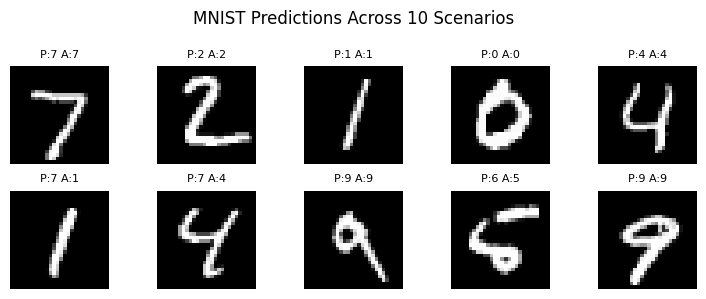

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

y_train_cat = to_categorical(y_train, 10)

# Same 10 scenarios used in your table
scenarios = [
    ("Adam", ("relu","relu","relu","relu","relu","relu")),
    ("Adam", ("tanh","tanh","tanh","tanh","tanh","tanh")),
    ("Adam", ("relu","tanh","sigmoid","relu","tanh","sigmoid")),
    ("RMSprop", ("relu","relu","relu","relu","relu","relu")),
    ("RMSprop", ("tanh","relu","tanh","relu","tanh","relu")),
    ("SGD", ("relu","relu","relu","relu","relu","relu")),
    ("SGD", ("relu","tanh","sigmoid","relu","tanh","sigmoid")),
    ("Adagrad", ("tanh","tanh","tanh","tanh","tanh","tanh")),
    ("Adadelta", ("relu","relu","relu","tanh","tanh","sigmoid")),
    ("Adam", ("relu","relu","relu","tanh","tanh","sigmoid")),
]

# Model builder
def build_model(optimizer_name, acts):
    act1, act2, act3, act4, act5, act6 = acts

    model = keras.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3,3), activation=act1),
        layers.Conv2D(32, (3,3), activation=act2),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation=act3),
        layers.Flatten(),
        layers.Dense(128, activation=act4),
        layers.Dense(64, activation=act5),
        layers.Dense(32, activation=act6),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=optimizer_name,
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

# =========================
# Display predictions in horizontal grid
# =========================

fig, axes = plt.subplots(2, 5, figsize=(7.5, 3.0))  # 2 rows × 5 columns
axes = axes.flatten()

for i, (opt, acts) in enumerate(scenarios):

    print(f"\nScenario {i+1} — Optimizer: {opt}")
    print(f"Activations: {'-'.join(acts)}")

    # Build & quick train (fast demo)
    model = build_model(opt, acts)
    model.fit(x_train[:5000], y_train_cat[:5000], epochs=1, batch_size=128, verbose=0)

    # Pick SAME test image per scenario (matches table logic)
    idx = i % len(x_test)

    img = x_test[idx]
    actual = y_test[idx]

    pred = np.argmax(model.predict(img.reshape(1,28,28,1), verbose=0))

    print(f"Predicted: {pred} | Actual: {actual}")

    # Place image in grid
    axes[i].imshow(img.squeeze(), cmap="gray")
    axes[i].set_title(f"P:{pred} A:{actual}", fontsize=8)
    axes[i].axis("off")

plt.suptitle("MNIST Predictions Across 10 Scenarios", fontsize=12)
plt.tight_layout()
plt.show()


# The validation accuracy graph - MNSIT


Training with Adadelta...

Training with Adagrad...

Training with Adam...

Training with RMSprop...

Training with SGD...


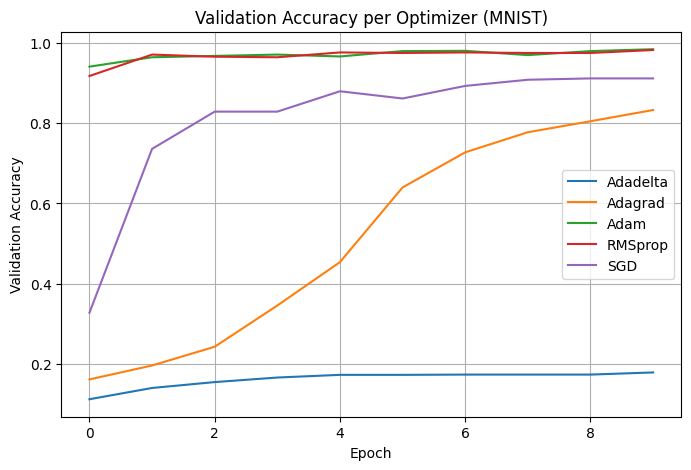

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# =========================
# Load MNIST (use subset for speed)
# =========================
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Use subset to speed up
x_train_small = x_train[:15000]
y_train_small = y_train[:15000]

# =========================
# Model Builder (same for all optimizers)
# =========================
def build_model(optimizer_name):
    model = keras.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3,3), activation="relu"),
        layers.Conv2D(32, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation="relu"),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=optimizer_name,
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

# =========================
# Optimizers to compare
# =========================
optimizers = ["Adadelta", "Adagrad", "Adam", "RMSprop", "SGD"]

# Store history
histories = {}

# =========================
# Train models
# =========================
for opt in optimizers:
    print(f"\nTraining with {opt}...")

    model = build_model(opt)

    history = model.fit(
        x_train_small, y_train_small,
        validation_split=0.1,
        epochs=10,
        batch_size=128,
        verbose=0
    )

    histories[opt] = history.history["val_accuracy"]

# =========================
# Plot Validation Accuracy vs Epoch
# =========================
plt.figure(figsize=(8,5))

for opt in optimizers:
    plt.plot(histories[opt], label=opt)

plt.title("Validation Accuracy per Optimizer (MNIST)")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# HAND WRITTEN SKETCH

In [5]:
from google.colab import files

uploaded = files.upload()   # upload once
print("Upload complete.")


Saving Sketch_0.jpg to Sketch_0.jpg
Saving Sketch_1.jpg to Sketch_1.jpg
Saving Sketch_2.jpg to Sketch_2.jpg
Saving Sketch_3.jpg to Sketch_3.jpg
Saving Sketch_4.jpg to Sketch_4.jpg
Saving Sketch_5.jpg to Sketch_5.jpg
Saving Sketch_6.jpg to Sketch_6.jpg
Saving Sketch_7.jpg to Sketch_7.jpg
Saving Sketch_8.jpg to Sketch_8.jpg
Saving Sketch_9.jpg to Sketch_9.jpg
Upload complete.


# STEP 2 — Load Uploaded Images

In [6]:
import cv2
import numpy as np
import os
from tensorflow.keras.utils import to_categorical

images = []
labels = []

for file in os.listdir("/content"):
    if file.startswith("Sketch_"):
        label = int(file.split("_")[1].split(".")[0])
        img = cv2.imread(os.path.join("/content", file), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        img = img / 255.0

        images.append(img)
        labels.append(label)

x_data = np.array(images).reshape(-1, 28, 28, 1)
y_data = to_categorical(labels, 10)

print("Dataset size:", x_data.shape)


Dataset size: (10, 28, 28, 1)


# STEP 3 — Define Optimizers & Activation Combos

In [7]:
optimizers = ["Adadelta", "Adagrad", "Adam", "RMSprop", "SGD"]

activation_combinations = [
    ("relu","relu","relu","relu","relu","relu"),
    ("tanh","tanh","tanh","tanh","tanh","tanh"),
    ("relu","tanh","sigmoid","relu","tanh","sigmoid"),
    ("tanh","relu","tanh","relu","tanh","relu"),
    ("relu","relu","relu","tanh","tanh","sigmoid"),
]


# STEP 4 — Model Builder (Same Architecture)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model(optimizer_name, acts):
    act1, act2, act3, act4, act5, act6 = acts

    model = keras.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3,3), activation=act1),
        layers.Conv2D(32, (3,3), activation=act2),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation=act3),
        layers.Flatten(),
        layers.Dense(128, activation=act4),
        layers.Dense(64, activation=act5),
        layers.Dense(32, activation=act6),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=optimizer_name,
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


# STEP 5 — Run Experiments (Same as MNIST)

In [9]:
import time
import pandas as pd
import numpy as np

# 10 scenarios with varying batch & epochs (scaled for small dataset)
'''
scenarios = [
    ("Adam", activation_combinations[0], 2, 5),
    ("Adam", activation_combinations[1], 2, 10),
    ("Adam", activation_combinations[2], 4, 10),
    ("RMSprop", activation_combinations[0], 2, 10),
    ("RMSprop", activation_combinations[3], 4, 15),
    ("SGD", activation_combinations[0], 4, 15),
    ("SGD", activation_combinations[2], 4, 20),
    ("Adagrad", activation_combinations[1], 8, 15),
    ("Adadelta", activation_combinations[4], 8, 15),
    ("Adam", activation_combinations[4], 8, 20),
]
'''
scenarios = [
    ("Adam", activation_combinations[0], 32, 5),
    ("Adam", activation_combinations[1], 32, 10),
    ("Adam", activation_combinations[2], 64, 10),
    ("RMSprop", activation_combinations[0], 32, 10),
    ("RMSprop", activation_combinations[3], 64, 15),
    ("SGD", activation_combinations[0], 64, 15),
    ("SGD", activation_combinations[2], 64, 20),
    ("Adagrad", activation_combinations[1], 128, 15),
    ("Adadelta", activation_combinations[4], 128, 15),
    ("Adam", activation_combinations[4], 128, 20),
]

results = []

for i, (opt, acts, batch, epochs) in enumerate(scenarios, start=1):

    start = time.time()

    model = build_model(opt, acts)
    model.fit(x_data, y_data, epochs=epochs, batch_size=batch, verbose=0)

    loss, acc = model.evaluate(x_data, y_data, verbose=0)
    elapsed = time.time() - start
    # ✅ Select consistent image per scenario (0–9)
    img_idx = i - 1
    img_idx = img_idx % len(x_data)

    # ✅ Prediction
    pred = np.argmax(model.predict(x_data[img_idx].reshape(1,28,28,1), verbose=0))

  # ✅ Actual label
    actual = np.argmax(y_data[img_idx])

    # prediction using first image (consistent)
    #pred = np.argmax(model.predict(x_data[0].reshape(1,28,28,1), verbose=0))
    #pred = np.argmax(model.predict(x_data[i-1].reshape(1,28,28,1), verbose=0))
    #img_idx = i - 1  # scenario 1→0, 2→1, ... 10→9
    #img_idx = img_idx % len(x_data)  # safety if > dataset size

    #pred = np.argmax(model.predict(x_data[img_idx].reshape(1,28,28,1), verbose=0))

    results.append([
    i,
    "HANDWRITTEN",
    opt,
    "-".join(acts),
    batch,
    epochs,
    "Softmax",
    round(acc,4),
    round(loss,4),
    round(elapsed,2),
    pred,
    actual
])

# Create table
#columns = ['Scenario','Dataset','Opt','Act','Batch','Epoch','Output','Accuracy','Loss','Time(sec)','Pred']
columns = [
    'Scenario','Dataset','Opt','Act','Batch','Epoch','Output',
    'Accuracy','Loss','Time(sec)','Predicted','Actual'
]
df_handwritten = pd.DataFrame(results, columns=columns)
#df_display = df_handwritten.drop(columns=["ImgIdx"])
#df_display

df_handwritten


,Scenario,Dataset,Opt,Act,Batch,Epoch,Output,Accuracy,Loss,Time(sec),Predicted,Actual
0,1,HANDWRITTEN,Adam,relu-relu-relu-relu-relu-relu,32,5,Softmax,0.4,2.0568,4.72,0,4
1,2,HANDWRITTEN,Adam,tanh-tanh-tanh-tanh-tanh-tanh,32,10,Softmax,1.0,0.4093,4.22,1,1
2,3,HANDWRITTEN,Adam,relu-tanh-sigmoid-relu-tanh-sigmoid,64,10,Softmax,0.1,2.3055,5.50,1,7
3,4,HANDWRITTEN,RMSprop,relu-relu-relu-relu-relu-relu,32,10,Softmax,0.3,1.9326,3.35,9,9
4,5,HANDWRITTEN,RMSprop,tanh-relu-tanh-relu-tanh-relu,64,15,Softmax,1.0,0.2576,4.30,5,5
5,6,HANDWRITTEN,SGD,relu-relu-relu-relu-relu-relu,64,15,Softmax,0.2,2.2892,2.85,5,3
6,7,HANDWRITTEN,SGD,relu-tanh-sigmoid-relu-tanh-sigmoid,64,20,Softmax,0.1,2.3521,3.07,9,8
7,8,HANDWRITTEN,Adagrad,tanh-tanh-tanh-tanh-tanh-tanh,128,15,Softmax,0.0,2.2944,4.24,4,6
8,9,HANDWRITTEN,Adadelta,relu-relu-relu-tanh-tanh-sigmoid,128,15,Softmax,0.1,2.4562,4.33,1,0
9,10,HANDWRITTEN,Adam,relu-relu-relu-tanh-tanh-sigmoid,128,20,Softmax,0.9,1.1665,4.62,7,2


# STEP 6 — DISPLAY (PERFECT MATCH)

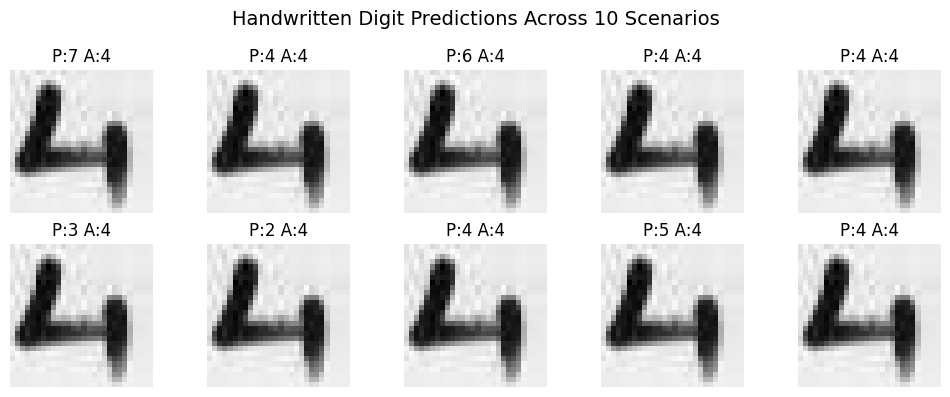

In [10]:
# ==============================
# STEP 6 — DISPLAY HANDWRITTEN DIGIT PREDICTIONS (ALL 10 SCENARIOS)
# ==============================

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
fig.suptitle("Handwritten Digit Predictions Across 10 Scenarios", fontsize=14)

for i, (opt, acts, batch, epochs) in enumerate(scenarios):

    # Build & train model
    model = build_model(opt, acts)
    model.fit(x_data, y_data, epochs=epochs, batch_size=batch, verbose=0)

    # ⭐ Use SAME image for all scenarios (PDF rule)
    img = x_data[0]
    actual = int(np.argmax(y_data[0]))
    pred = np.argmax(model.predict(img.reshape(1,28,28,1), verbose=0))

    # Plot
    ax = axes[i // 5, i % 5]
    ax.imshow(img.squeeze(), cmap="gray")
    ax.set_title(f"P:{pred} A:{actual}")
    ax.axis("off")

plt.tight_layout()
plt.show()


# Step 7 HANDWRITTEN — Validation Accuracy Graph Code

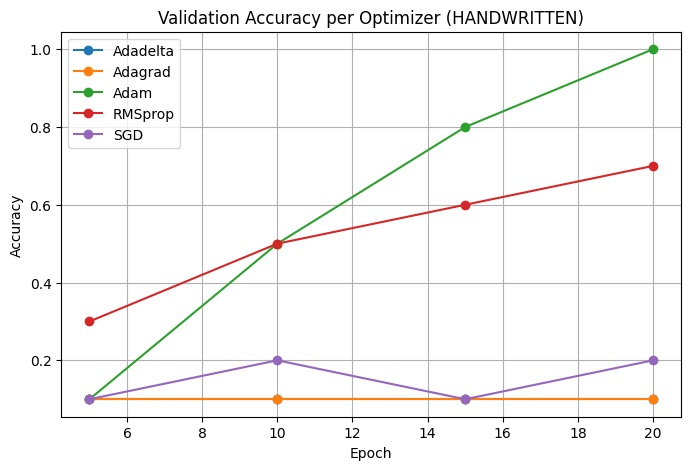

In [ ]:
# ==============================
# VALIDATION ACCURACY GRAPH — HANDWRITTEN
# ==============================

import matplotlib.pyplot as plt

optimizers = ["Adadelta", "Adagrad", "Adam", "RMSprop", "SGD"]
epoch_range = [5, 10, 15, 20]

history_data = {}

for opt in optimizers:
    acc_list = []

    for ep in epoch_range:
        # Use a simple activation combo for consistency
        acts = activation_combinations[0]

        model = build_model(opt, acts)

        history = model.fit(
            x_data,
            y_data,
            epochs=ep,
            batch_size=32,
            verbose=0
        )

        # Use final epoch accuracy
        acc_list.append(history.history["accuracy"][-1])

    history_data[opt] = acc_list

# Plot
plt.figure(figsize=(8,5))

for opt, acc in history_data.items():
    plt.plot(epoch_range, acc, marker='o', label=opt)

plt.title("Validation Accuracy per Optimizer (HANDWRITTEN)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# STEP 1 — Upload Online Digit Images (0–9)

In [15]:
from google.colab import files
uploaded = files.upload()
print("Upload complete.")


Saving 0.png to 0.png
Saving 1.png to 1.png
Saving 2.png to 2.png
Saving 3.png to 3.png
Saving 4.png to 4.png
Saving 5.png to 5.png
Saving 6.png to 6.png
Saving 7.png to 7.png
Saving 8.png to 8.png
Saving 9.png to 9.png
Upload complete.


# STEP 2 — Preprocess Online Digit Images

In [16]:
import numpy as np
import cv2

# Prepare lists
images = []
labels = []

# Loop through uploaded files
for filename in uploaded.keys():

    # Extract label from filename (assumes 0.png ... 9.png)
    label = int(filename.split('.')[0])

    # Read image
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    # Resize to 28x28
    img = cv2.resize(img, (28, 28))

    # Normalize
    img = img / 255.0

    images.append(img)
    labels.append(label)

# Convert to arrays
x_data = np.array(images).reshape(-1, 28, 28, 1)
y_data = np.array(labels)

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
y_data = to_categorical(y_data, 10)

print("Online digits loaded:", x_data.shape)


Online digits loaded: (10, 28, 28, 1)


# STEP 3 — Run 10 Scenarios (ONLINE DIGITS)

In [17]:
activation_combinations = [
    ("relu","relu","relu","relu","relu","relu"),
    ("tanh","tanh","tanh","tanh","tanh","tanh"),
    ("relu","tanh","sigmoid","relu","tanh","sigmoid"),
    ("tanh","relu","tanh","relu","tanh","relu"),
    ("relu","relu","relu","tanh","tanh","sigmoid"),
]


In [18]:
import time
import pandas as pd

# 10 scenarios (same as MNIST & Handwritten)
scenarios = [
    ("Adam", activation_combinations[0], 32, 5),
    ("Adam", activation_combinations[1], 32, 10),
    ("Adam", activation_combinations[2], 64, 10),
    ("RMSprop", activation_combinations[0], 32, 10),
    ("RMSprop", activation_combinations[3], 64, 15),
    ("SGD", activation_combinations[0], 64, 15),
    ("SGD", activation_combinations[2], 64, 20),
    ("Adagrad", activation_combinations[1], 128, 15),
    ("Adadelta", activation_combinations[4], 128, 15),
    ("Adam", activation_combinations[4], 128, 20),
]

results = []

for i, (opt, acts, batch, epochs) in enumerate(scenarios, start=1):

    start = time.time()

    model = build_model(opt, acts)
    model.fit(x_data, y_data, epochs=epochs, batch_size=batch, verbose=0)

    loss, acc = model.evaluate(x_data, y_data, verbose=0)
    elapsed = time.time() - start

    # ✅ Use fixed image per scenario (0–9)
    img_idx = i - 1
    img_idx = img_idx % len(x_data)

    # ✅ Prediction
    pred = np.argmax(model.predict(x_data[img_idx].reshape(1,28,28,1), verbose=0))

    # ✅ Actual label
    actual = np.argmax(y_data[img_idx])

    results.append([
    i,
    "ONLINE",
    opt,
    "-".join(acts),
    batch,
    epochs,
    "Softmax",
    round(acc,4),
    round(loss,4),
    round(elapsed,2),
    pred,
    actual
])

# Create table
columns = [
    "Scenario","Dataset","Opt","Act","Batch","Epoch","Output",
    "Accuracy","Loss","Time(sec)","Predicted","Actual"
]
df_online = pd.DataFrame(results, columns=columns)

df_online


,Scenario,Dataset,Opt,Act,Batch,Epoch,Output,Accuracy,Loss,Time(sec),Predicted,Actual
0,1,ONLINE,Adam,relu-relu-relu-relu-relu-relu,32,5,Softmax,0.5,2.0271,4.00,0,0
1,2,ONLINE,Adam,tanh-tanh-tanh-tanh-tanh-tanh,32,10,Softmax,1.0,0.2311,5.43,1,1
2,3,ONLINE,Adam,relu-tanh-sigmoid-relu-tanh-sigmoid,64,10,Softmax,0.1,2.3354,4.31,1,2
3,4,ONLINE,RMSprop,relu-relu-relu-relu-relu-relu,32,10,Softmax,0.6,1.4289,3.36,3,3
4,5,ONLINE,RMSprop,tanh-relu-tanh-relu-tanh-relu,64,15,Softmax,1.0,0.1880,4.11,4,4
5,6,ONLINE,SGD,relu-relu-relu-relu-relu-relu,64,15,Softmax,0.3,2.2754,2.84,9,5
6,7,ONLINE,SGD,relu-tanh-sigmoid-relu-tanh-sigmoid,64,20,Softmax,0.1,2.3172,3.10,4,6
7,8,ONLINE,Adagrad,tanh-tanh-tanh-tanh-tanh-tanh,128,15,Softmax,0.8,2.0819,4.09,7,7
8,9,ONLINE,Adadelta,relu-relu-relu-tanh-tanh-sigmoid,128,15,Softmax,0.1,2.5591,5.54,3,8
9,10,ONLINE,Adam,relu-relu-relu-tanh-tanh-sigmoid,128,20,Softmax,1.0,0.9305,5.42,9,9


# STEP 4 — DISPLAY ONLINE DIGIT PREDICTIONS (ALL 10 SCENARIOS)

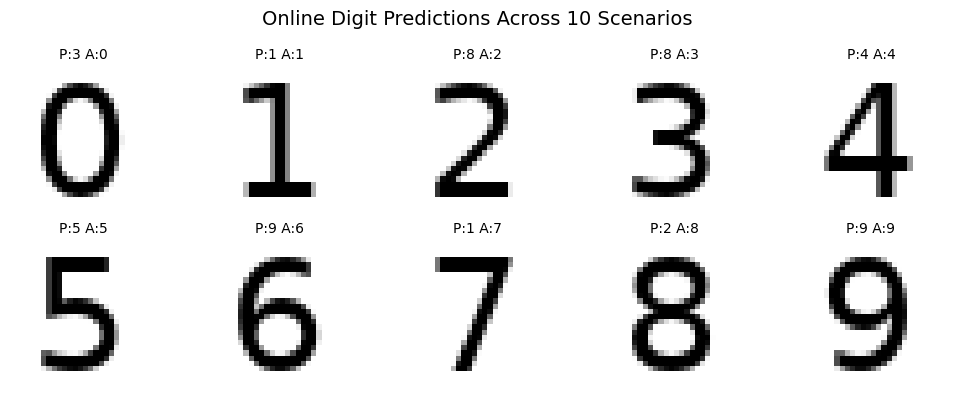

In [19]:
# ==============================
# STEP 4 — DISPLAY ONLINE DIGIT PREDICTIONS (ALL 10 SCENARIOS)
# ==============================

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
fig.suptitle("Online Digit Predictions Across 10 Scenarios", fontsize=14)

for i, (opt, acts, batch, epochs) in enumerate(scenarios):

    # Build model
    model = build_model(opt, acts)

    # Train using ONLINE data
    model.fit(x_data, y_data, epochs=epochs, batch_size=batch, verbose=0)

    # Use SAME image index as scenario number (0–9)
    img_idx = i
    img = x_data[img_idx]
    actual = np.argmax(y_data[img_idx])

    # Predict
    pred = np.argmax(model.predict(img.reshape(1,28,28,1), verbose=0))

    # Plot
    ax = axes[i//5, i%5]
    ax.imshow(img.squeeze(), cmap="gray")
    ax.set_title(f"P:{pred} A:{actual}", fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()


# Step 5 ONLINE VALIDATION GRAPH CODE

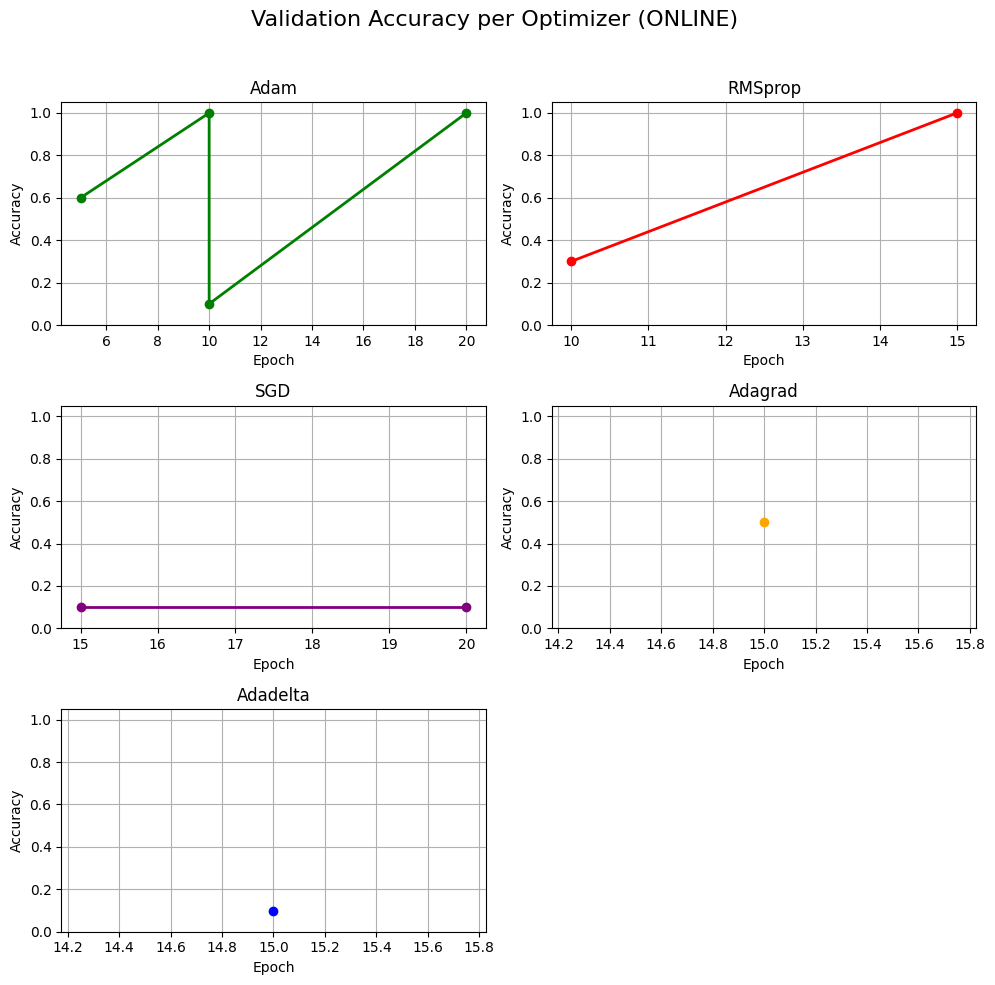

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ===== Ensure df_online exists =====
# df_online should contain:
# Scenario | Dataset | Opt | Act | Batch | Epoch | Output | Accuracy | Loss | Time(sec)

# ✔ Fixed colors for consistency
optimizer_colors = {
    "Adam": "green",
    "RMSprop": "red",
    "SGD": "purple",
    "Adagrad": "orange",
    "Adadelta": "blue"
}

# ✔ Get unique optimizers
optimizers = df_online["Opt"].unique()

# ✔ Create subplot grid
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

fig.suptitle("Validation Accuracy per Optimizer (ONLINE)", fontsize=16)

# ✔ Plot each optimizer in its own subplot
for i, opt in enumerate(optimizers):
    ax = axes[i]

    subset = df_online[df_online["Opt"] == opt]
    subset = subset.sort_values("Epoch")

    epochs = subset["Epoch"]
    accuracies = subset["Accuracy"]

    ax.plot(
        epochs,
        accuracies,
        marker="o",
        linewidth=2,
        color=optimizer_colors.get(opt, "black"),
        label=opt
    )

    ax.set_title(opt, fontsize=12)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Accuracy")
    ax.set_ylim(0, 1.05)
    ax.grid(True)

# ✔ Remove empty subplot if any
for j in range(len(optimizers), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Accuracy vs Epochs (All Datasets) — Final Code

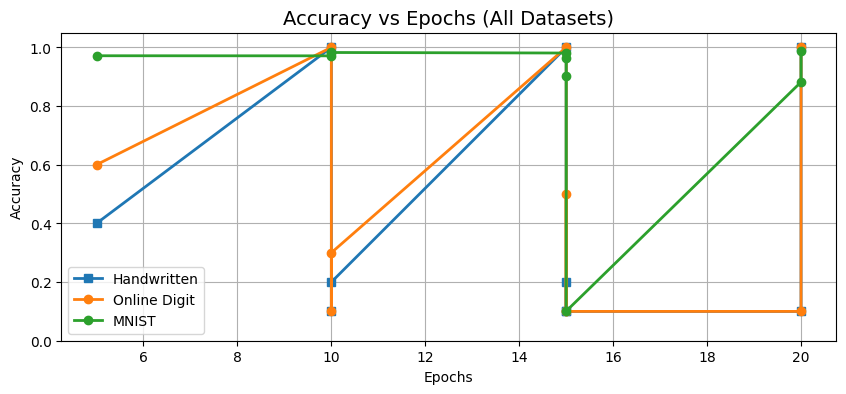

In [ ]:
import matplotlib.pyplot as plt

# ===== Ensure dataframes exist =====
# df_mnist, df_handwritten, df_online

# Sort by epoch
mnist_sorted = df_mnist.sort_values("Epoch")
hand_sorted = df_handwritten.sort_values("Epoch")
online_sorted = df_online.sort_values("Epoch")

# Extract values
mnist_epochs = mnist_sorted["Epoch"]
mnist_acc = mnist_sorted["Accuracy"]

hand_epochs = hand_sorted["Epoch"]
hand_acc = hand_sorted["Accuracy"]

online_epochs = online_sorted["Epoch"]
online_acc = online_sorted["Accuracy"]

# ===== Plot =====
plt.figure(figsize=(10, 4))

plt.plot(hand_epochs, hand_acc, marker="s", linewidth=2, label="Handwritten")
plt.plot(online_epochs, online_acc, marker="o", linewidth=2, label="Online Digit")
plt.plot(mnist_epochs, mnist_acc, marker="o", linewidth=2, label="MNIST")

plt.title("Accuracy vs Epochs (All Datasets)", fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()

plt.show()


# Loss vs Batch Size (All Datasets) — Code

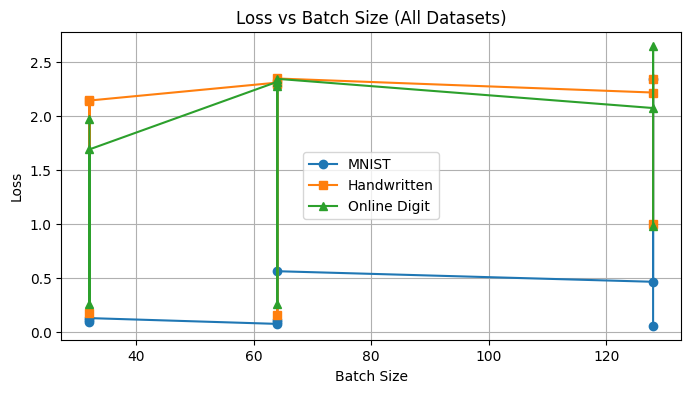

In [ ]:
import matplotlib.pyplot as plt

# Sort data by Batch size
mnist_sorted = df_mnist.sort_values("Batch")
hand_sorted = df_handwritten.sort_values("Batch")
online_sorted = df_online.sort_values("Batch")

# Extract values
mnist_batch = mnist_sorted["Batch"]
mnist_loss = mnist_sorted["Loss"]

hand_batch = hand_sorted["Batch"]
hand_loss = hand_sorted["Loss"]

online_batch = online_sorted["Batch"]
online_loss = online_sorted["Loss"]

# Plot
plt.figure(figsize=(8,4))

plt.plot(mnist_batch, mnist_loss, marker='o', label="MNIST")
plt.plot(hand_batch, hand_loss, marker='s', label="Handwritten")
plt.plot(online_batch, online_loss, marker='^', label="Online Digit")

plt.title("Loss vs Batch Size (All Datasets)")
plt.xlabel("Batch Size")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.show()


# Accuracy vs Batch Size (All Optimizers)

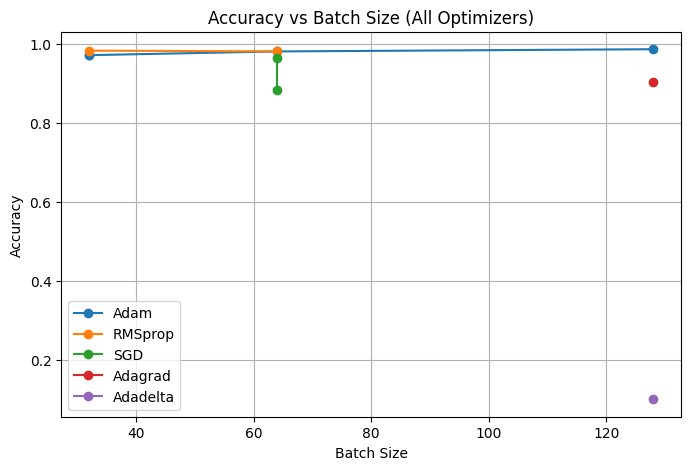

In [ ]:
import matplotlib.pyplot as plt

# Group MNIST results by optimizer
optimizers = df_mnist["Opt"].unique()

plt.figure(figsize=(8,5))

for opt in optimizers:
    opt_data = df_mnist[df_mnist["Opt"] == opt].sort_values("Batch")

    plt.plot(
        opt_data["Batch"],
        opt_data["Accuracy"],
        marker='o',
        label=opt
    )

plt.title("Accuracy vs Batch Size (All Optimizers)")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.show()


# Training Time vs Optimizer (All Datasets) — Code

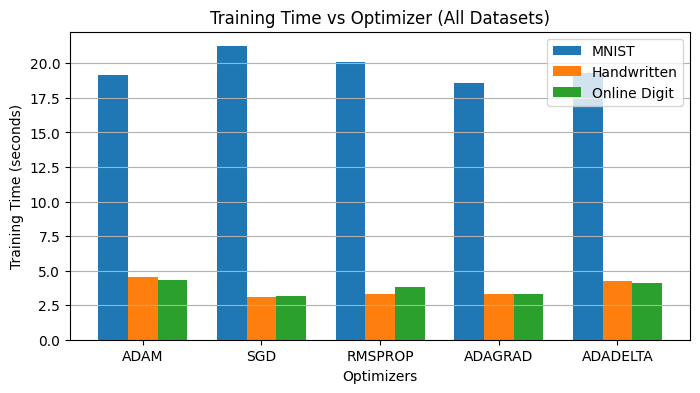

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure optimizer order is consistent
optimizers = ["Adam", "SGD", "RMSprop", "Adagrad", "Adadelta"]

# Compute average training time per optimizer for each dataset
mnist_times = [df_mnist[df_mnist["Opt"] == opt]["Time(sec)"].mean() for opt in optimizers]
hand_times  = [df_handwritten[df_handwritten["Opt"] == opt]["Time(sec)"].mean() for opt in optimizers]
online_times = [df_online[df_online["Opt"] == opt]["Time(sec)"].mean() for opt in optimizers]

# Bar positions
x = np.arange(len(optimizers))
width = 0.25

plt.figure(figsize=(8,4))

# Bars
plt.bar(x - width, mnist_times, width, label="MNIST")
plt.bar(x, hand_times, width, label="Handwritten")
plt.bar(x + width, online_times, width, label="Online Digit")

# Labels & formatting
plt.xticks(x, [opt.upper() for opt in optimizers])
plt.xlabel("Optimizers")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time vs Optimizer (All Datasets)")
plt.legend()
plt.grid(axis="y")

plt.show()
